<a href="https://colab.research.google.com/github/NinaAbeyratne/Analysing_HCHO_gas_in_Sri_Lanka/blob/main/Spatio_Temporal_Analysis_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA

In [34]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
hcho_data = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/sorted_preprocessed_dataset.csv')

## Converting current_Data column to Datetime format

In [36]:
# Convert the 'Current Date' column to datetime format
hcho_data['current_Date'] = pd.to_datetime(hcho_data['current_Date'])

# Time Series Analysis

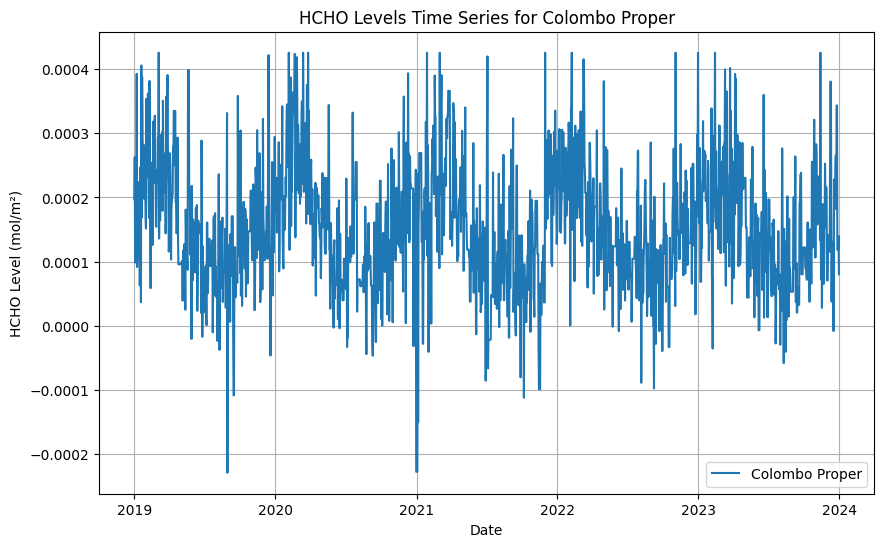

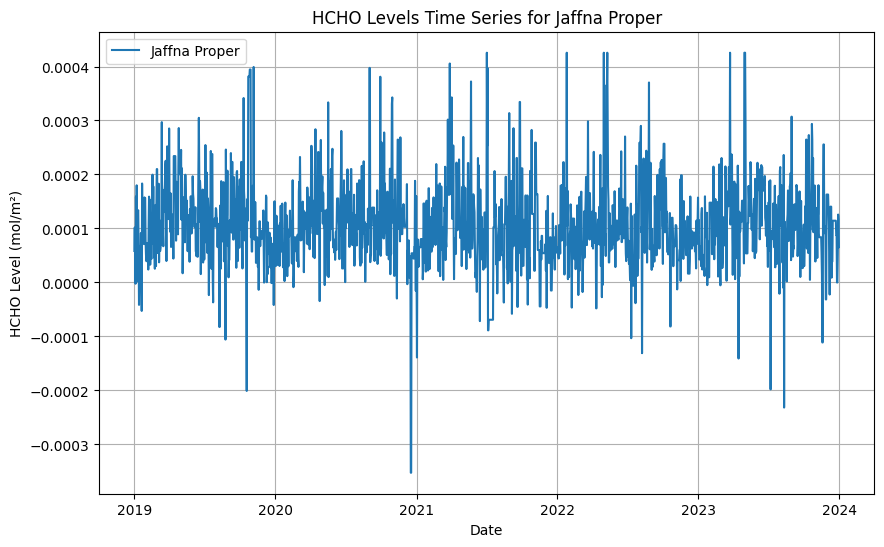

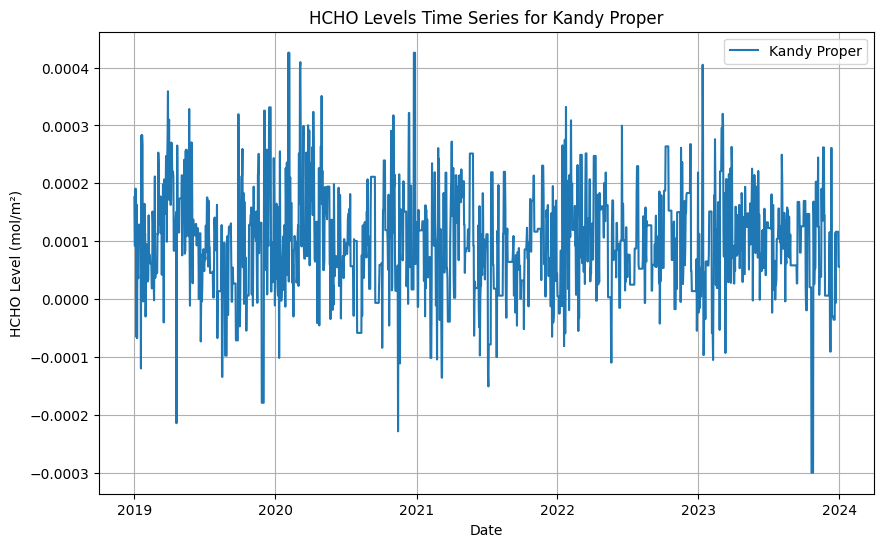

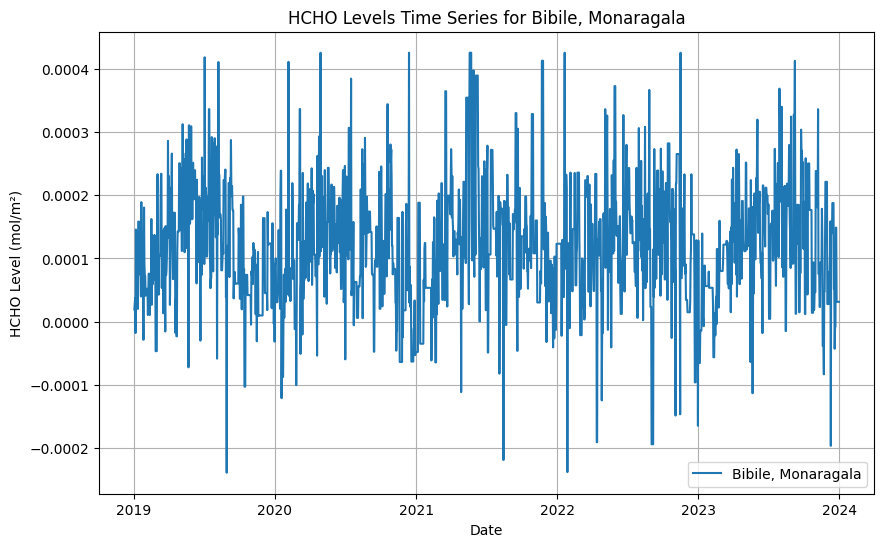

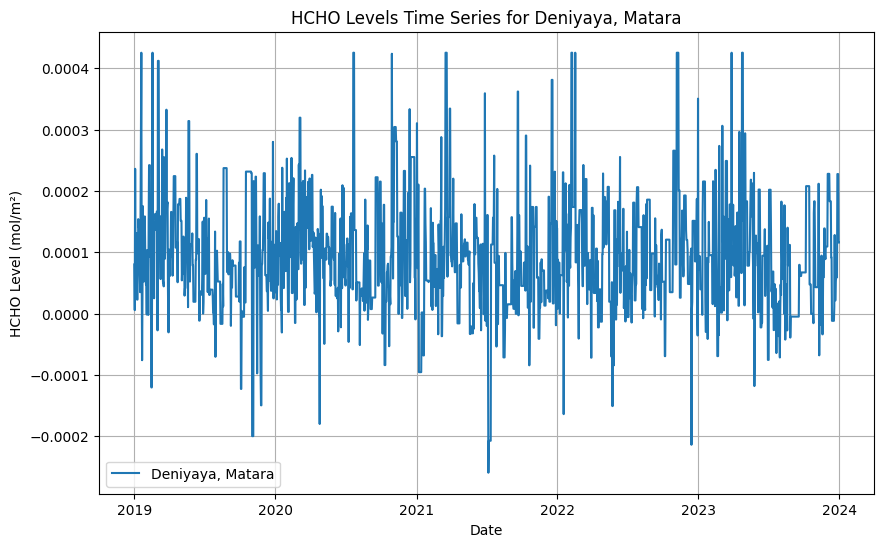

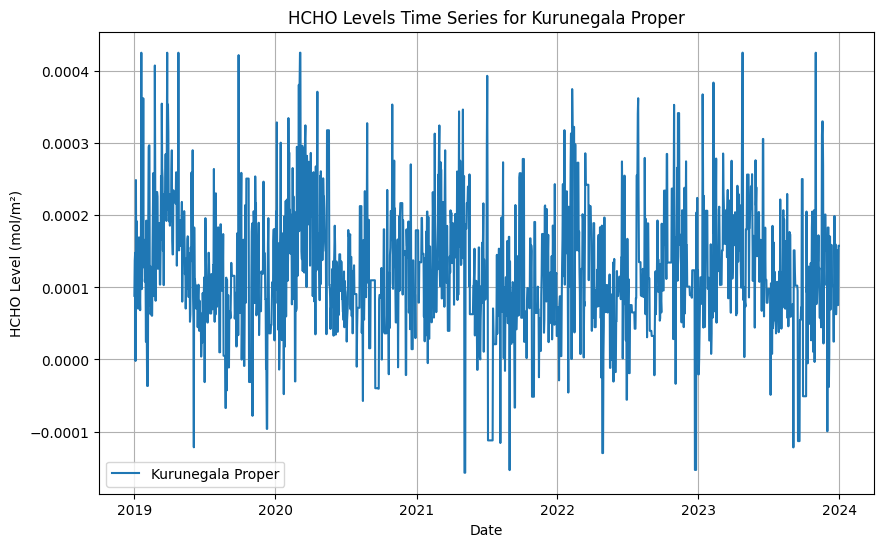

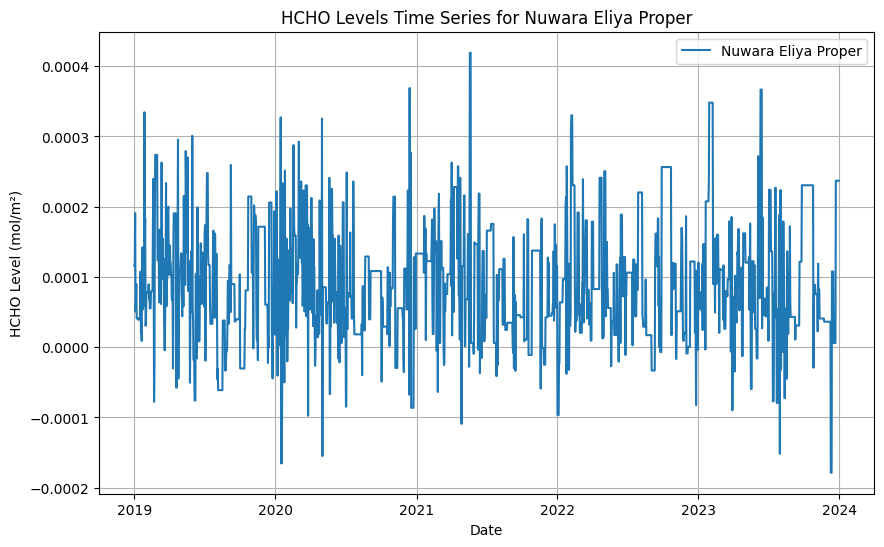

In [37]:
# Convert the 'Current Date' column to datetime format
hcho_data['current_Date'] = pd.to_datetime(hcho_data['current_Date'])

# Iterate over each city and plot its time series data
cities = hcho_data['Location'].unique()
for city in cities:
    city_data = hcho_data[hcho_data['Location'] == city]

    plt.figure(figsize=(10, 6))
    plt.plot(city_data['current_Date'], city_data['HCHO_reading'], label=city)
    plt.title('HCHO Levels Time Series for ' + city)
    plt.xlabel('Date')
    plt.ylabel('HCHO Level (mol/m²)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Time Series Analysis with Moving Average

<ipython-input-38-35c5224dad36>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['SMA'] = calculate_moving_average(city_data['HCHO_reading'], window=7)


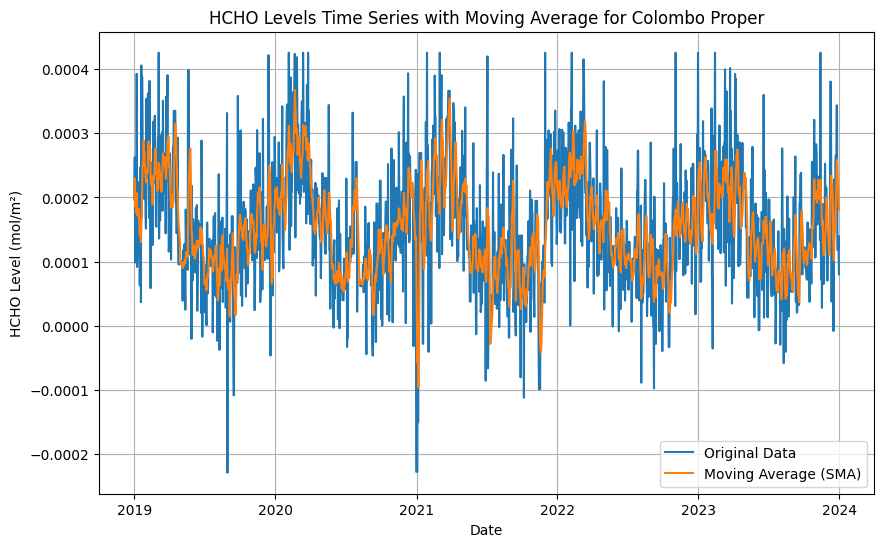

<ipython-input-38-35c5224dad36>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['SMA'] = calculate_moving_average(city_data['HCHO_reading'], window=7)


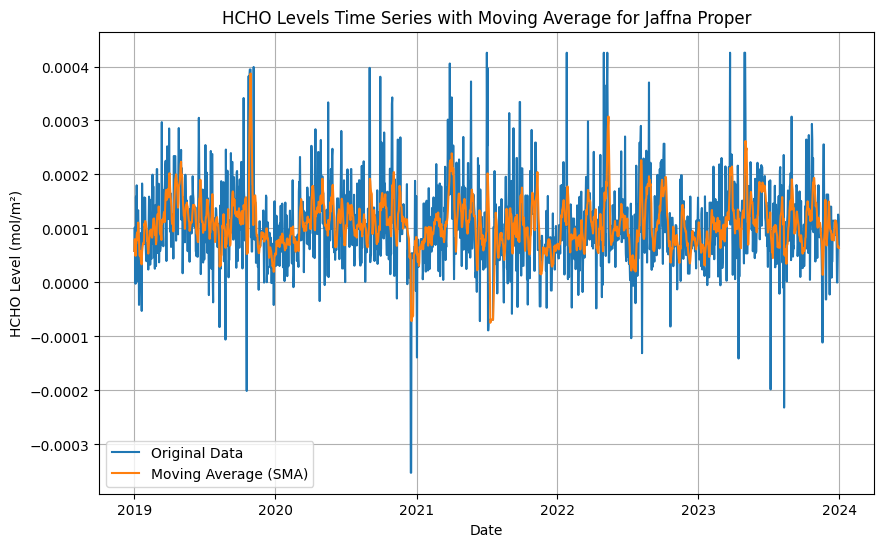

<ipython-input-38-35c5224dad36>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['SMA'] = calculate_moving_average(city_data['HCHO_reading'], window=7)


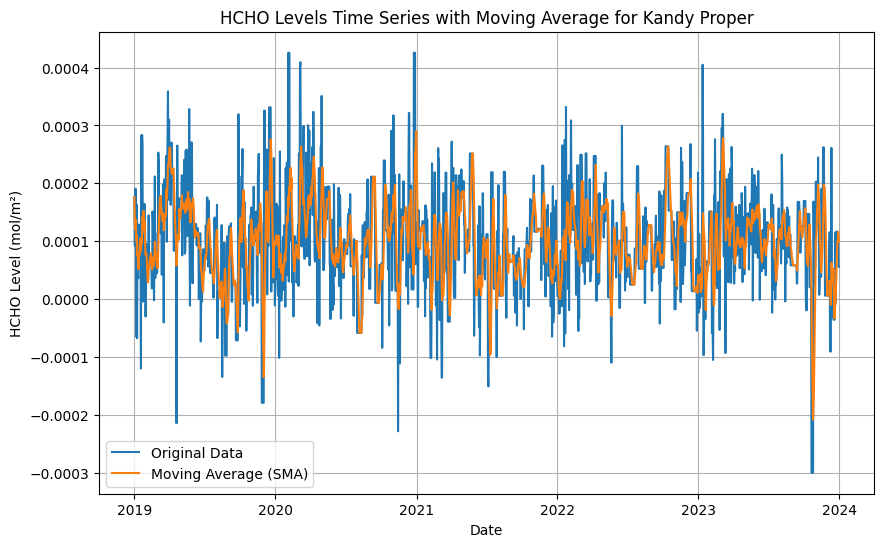

<ipython-input-38-35c5224dad36>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['SMA'] = calculate_moving_average(city_data['HCHO_reading'], window=7)


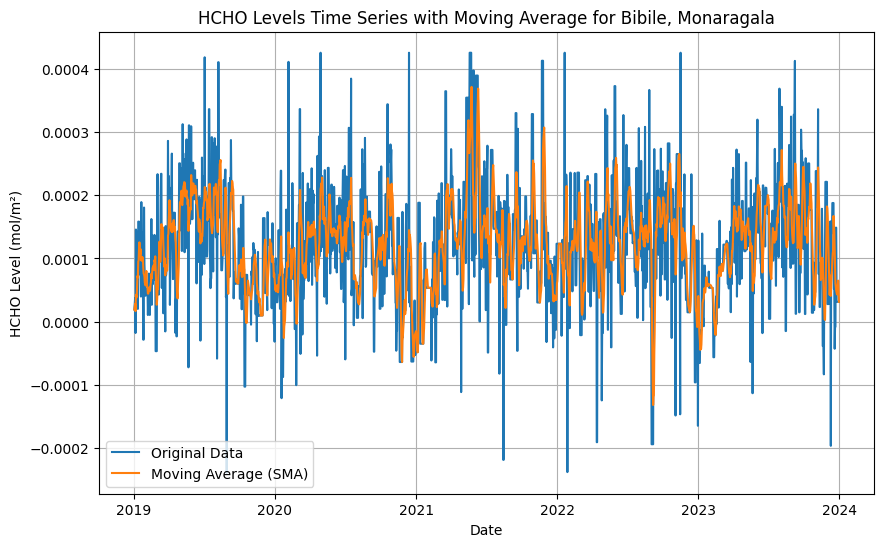

<ipython-input-38-35c5224dad36>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['SMA'] = calculate_moving_average(city_data['HCHO_reading'], window=7)


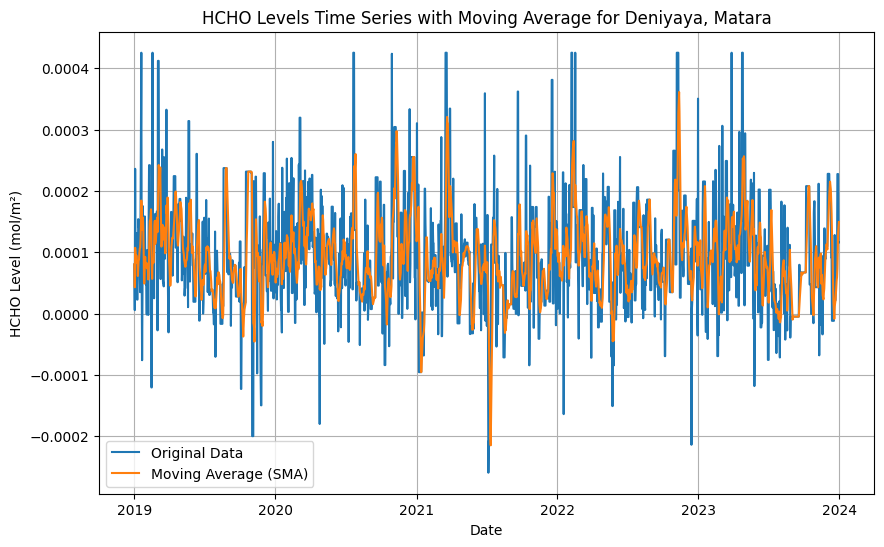

<ipython-input-38-35c5224dad36>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['SMA'] = calculate_moving_average(city_data['HCHO_reading'], window=7)


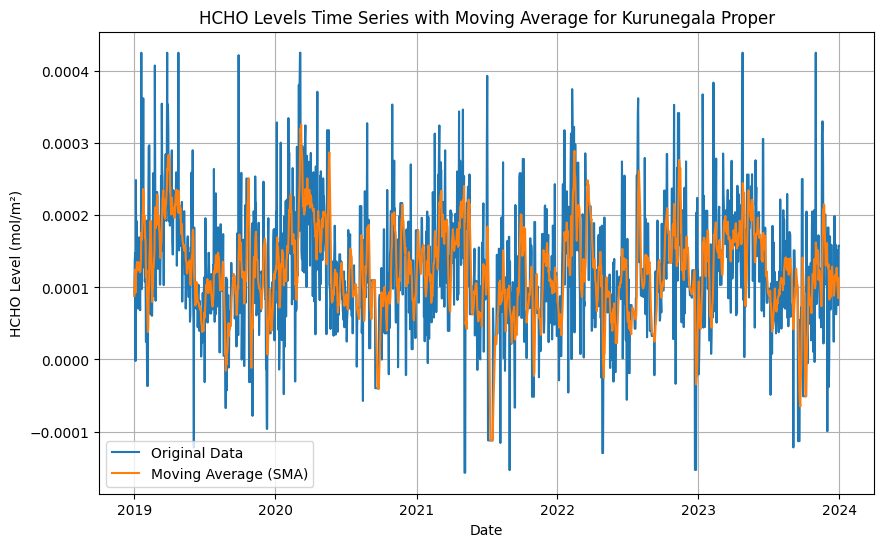

<ipython-input-38-35c5224dad36>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['SMA'] = calculate_moving_average(city_data['HCHO_reading'], window=7)


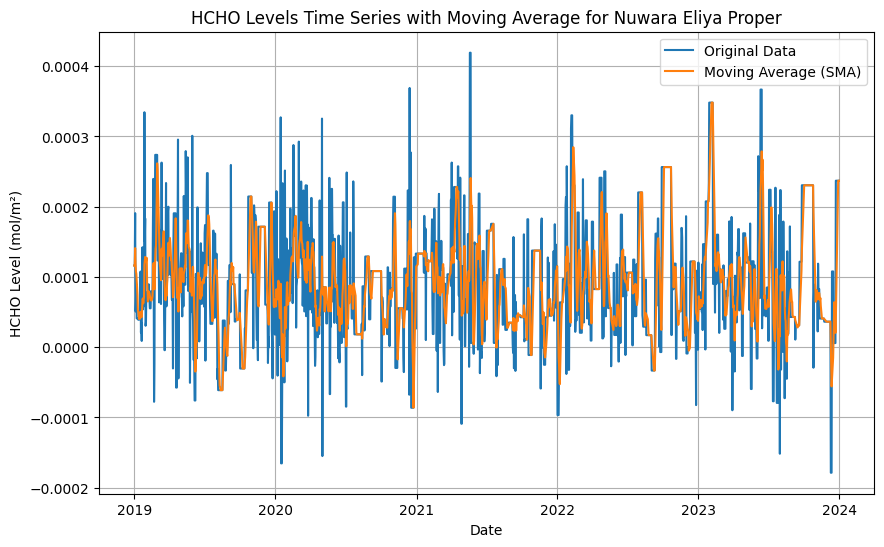

In [38]:
# Convert the 'Current Date' column to datetime format
hcho_data['current_Date'] = pd.to_datetime(hcho_data['current_Date'])

# Define a function to calculate moving averages
def calculate_moving_average(series, window):
    return series.rolling(window=window, min_periods=1).mean()

# Iterate over each city and plot its time series data along with moving average
cities = hcho_data['Location'].unique()
for city in cities:
    city_data = hcho_data[hcho_data['Location'] == city]

    # Calculate simple moving average with a window of 7 days
    city_data['SMA'] = calculate_moving_average(city_data['HCHO_reading'], window=7)

    plt.figure(figsize=(10, 6))
    plt.plot(city_data['current_Date'], city_data['HCHO_reading'], label='Original Data')
    plt.plot(city_data['current_Date'], city_data['SMA'], label='Moving Average (SMA)')
    plt.title('HCHO Levels Time Series with Moving Average for ' + city)
    plt.xlabel('Date')
    plt.ylabel('HCHO Level (mol/m²)')
    plt.legend()
    plt.grid(True)
    plt.show()

# External Factors

## Merging the Data

In [39]:
# Load weather data
weather_data = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/climate_data_DE_CW.csv')

In [40]:
# Convert date columns to datetime
hcho_data['current_Date'] = pd.to_datetime(hcho_data['current_Date'])
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

### Checking for unique values

In [41]:
# Check for city name consistency
print(hcho_data['Location'].unique())
print(weather_data['STATION'].unique())

['Colombo Proper' 'Jaffna Proper' 'Kandy Proper' 'Bibile, Monaragala'
 'Deniyaya, Matara' 'Kurunegala Proper' 'Nuwara Eliya Proper']
['CEM00043441' 'CEM00043466' 'CE000434730']


### Replace Station codes to actual locations

In [42]:
# Check unique values in 'STATION' column before replacement
print("Before replacement:", weather_data['STATION'].unique())

# Create a mapping of station codes to city names
station_to_city = {
    'CEM00043441': 'Kurunegala Proper',
    'CEM00043466': 'Colombo Proper',
    'CE000434730': 'Nuwara Eliya Proper'
}

# Replace station codes with city names in the 'STATION' column
weather_data['STATION'] = weather_data['STATION'].replace(station_to_city)

# Check unique values in 'STATION' column after replacement
print("After replacement:", weather_data['STATION'].unique())

Before replacement: ['CEM00043441' 'CEM00043466' 'CE000434730']
After replacement: ['Kurunegala Proper' 'Colombo Proper' 'Nuwara Eliya Proper']


## Rename Columns and Merge Dataset

In [43]:
# Rename columns in hcho_data and weather_data to create a common key for merging
hcho_data.rename(columns={'current_Date': 'Date', 'Location': 'City'}, inplace=True)
weather_data.rename(columns={'DATE': 'Date', 'STATION': 'City'}, inplace=True)

# Ensure the 'Date' columns are in datetime format
hcho_data['Date'] = pd.to_datetime(hcho_data['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Merge datasets on 'Date' and 'City'
merged_data = pd.merge(hcho_data, weather_data, on=['Date', 'City'], how='inner')

merged_data

,HCHO_reading,City,Date,PRCP,TAVG,TMAX,TMIN
0,0.000197,Colombo Proper,2019-01-01,0.00,81,89.0,74.0
1,0.000116,Nuwara Eliya Proper,2019-01-01,0.00,61,71.0,49.0
2,0.000263,Colombo Proper,2019-01-02,0.00,78,NaN,74.0
3,0.000137,Kurunegala Proper,2019-01-02,0.00,78,NaN,72.0
4,0.000116,Nuwara Eliya Proper,2019-01-02,0.00,59,NaN,49.0
...,...,...,...,...,...,...,...
5225,0.000158,Kurunegala Proper,2023-12-30,0.47,80,87.0,74.0
5226,0.000140,Colombo Proper,2023-12-30,0.10,81,90.0,76.0
5227,0.000158,Kurunegala Proper,2023-12-31,0.06,79,87.0,75.0
5228,0.000080,Colombo Proper,2023-12-31,0.33,81,NaN,75.0


In [44]:
merged_data.shape

(5230, 7)

## Save the merged dataset

In [45]:
# Save the merged data to a new CSV file
merged_data.to_csv('/content/drive/MyDrive/DE CW/Datasets/merged_dataset.csv', index=False)